In [8]:
import level_generator
import gym
import matplotlib.pyplot as plt
import a_star
from pyswip import Prolog
import time
import IPython.display as display

des_file = level_generator.create_level(width=14,height=14,num_gold=8)

kb = Prolog()
env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file)

obs = env.reset()

(37, 9)
searching
searching
searching
searching
apple stored
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching

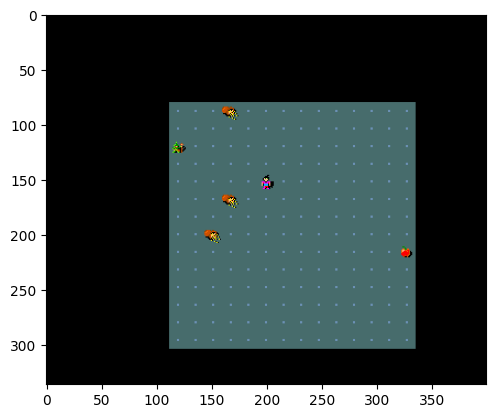

In [9]:
obs = env.reset()
player_pos = (obs['blstats'][0], obs['blstats'][1])
print(player_pos)
states = []
states.append(obs['pixel'][:,400:800])

reached = False
a_star.look_around(kb,obs)
print(list(kb.query('position(apple,commestible,X,Y)')))

image = plt.imshow(obs['pixel'][:,400:800])

for i in range(50):
    obs,_,_,_ = env.step(17)
    states.append(obs['pixel'][:,400:800])
# for i in range(50):
#     #a_star.look_around(kb,obs)
#     apple_info = list(kb.query('position(apple,commestible,X,Y)'))
#     print(apple_info)
#     apple_pos = (apple_info[0]['X'], apple_info[0]['Y'])
#     print(apple_pos)
#     if player_pos == apple_pos:
#         break
    
#     action_id = a_star.get_direction(apple_pos,player_pos,(40,40), kb)
#     obs,_,_,_ = env.step(action_id)
#     player_pos = (obs['blstats'][0], obs['blstats'][1])
#     print(f'player pos: {player_pos}')
#     states.append(obs['pixel'][:,400:800])




In [11]:
!pip install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 KB 1.2 MB/s eta 0:00:00a 0:00:01


In [10]:
import matplotlib.pyplot as plt
import imageio

images_tmp = states
images = []
# Impostazioni per il grafico, assicurati di regolarle secondo le tue esigenze
plt.figure()

# Loop attraverso la lista di immagini
# for img_array in images_tmp:
#     plt.imshow(img_array)
#     # Aggiungi eventuali altre impostazioni del grafico necessarie

#     # Aggiungi l'immagine al file GIF
#     plt.savefig('temp_image.png')  # Salva l'immagine temporanea in formato PNG
#     plt.clf()  # Pulisci la figura per la prossima immagine
#     images.append(imageio.imread('temp_image.png'))  # Aggiungi l'immagine temporanea alla lista
print(states)
# Salva la sequenza di immagini come GIF
kargs = { 'duration': 5 }
imageio.mimsave('output2.gif', states,fps=5)


[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

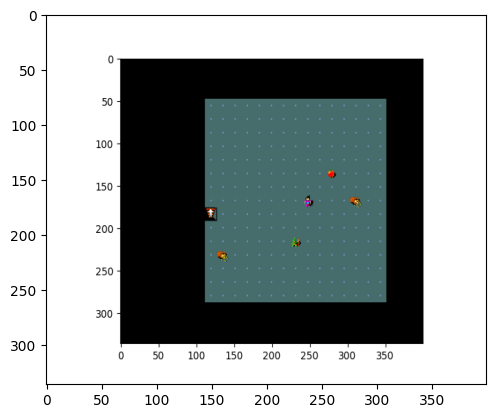

In [17]:
image = plt.imshow(obs['pixel'][:,400:800])
for state in states:
    time.sleep(0.5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(state)
time.sleep(0.5)
display.display(plt.gcf())
display.clear_output(wait=True)

In [ ]:
from nle.env.base import FULL_ACTIONS
from nle import _pynethack, nethack
MH_FULL_ACTIONS = list(FULL_ACTIONS)
MH_FULL_ACTIONS.remove(nethack.MiscDirection.UP)
print(MH_FULL_ACTIONS)

In [ ]:
obs, reward, done, info = env.step(2)
image = plt.imshow(obs['pixel'][:,400:800])

In [ ]:
obs, reward, done, info = env.step(2)
image = plt.imshow(obs['pixel'][:,400:800])